Kaggle Breast Cancer Wisconsin Diagnosis using Logistic Regression

 
It is given by Kaggle from UCI Machine Learning Repository, in one of its challenge 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. It is a dataset of Breast Cancer patients with Malignant and Benign tumor. 
Logistic Regression is used to predict whether the given patient is having Malignant or Benign tumor based on the attributes in the given dataset.

In [1036]:
# importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1037]:
#reading file named "data.csv" into a dataframe named "dataframe"
dataframe=pd.read_csv("data.csv")
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1038]:
#Analyzing the data if null value is there in the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1039]:
#removing column which is not needed from dataframe
dataframe=dataframe.drop(columns=['Unnamed: 32'])

In [1040]:
dataframe['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [1041]:
# Label encoding the string data of the dataframe as it is categorical data
encoder=LabelEncoder()
dataframe['diagnosis']=encoder.fit_transform(dataframe['diagnosis'])

In [1042]:
#Getting the total count of both the diseases
dataframe['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [1043]:
#checking for the null values
dataframe.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [1044]:
# numeric_dataframe=dataframe.select_dtypes(include=['float64', 'int64'])
correlations=dataframe.corr()  #finding the correlation between the dataframe
print(correlations)

                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

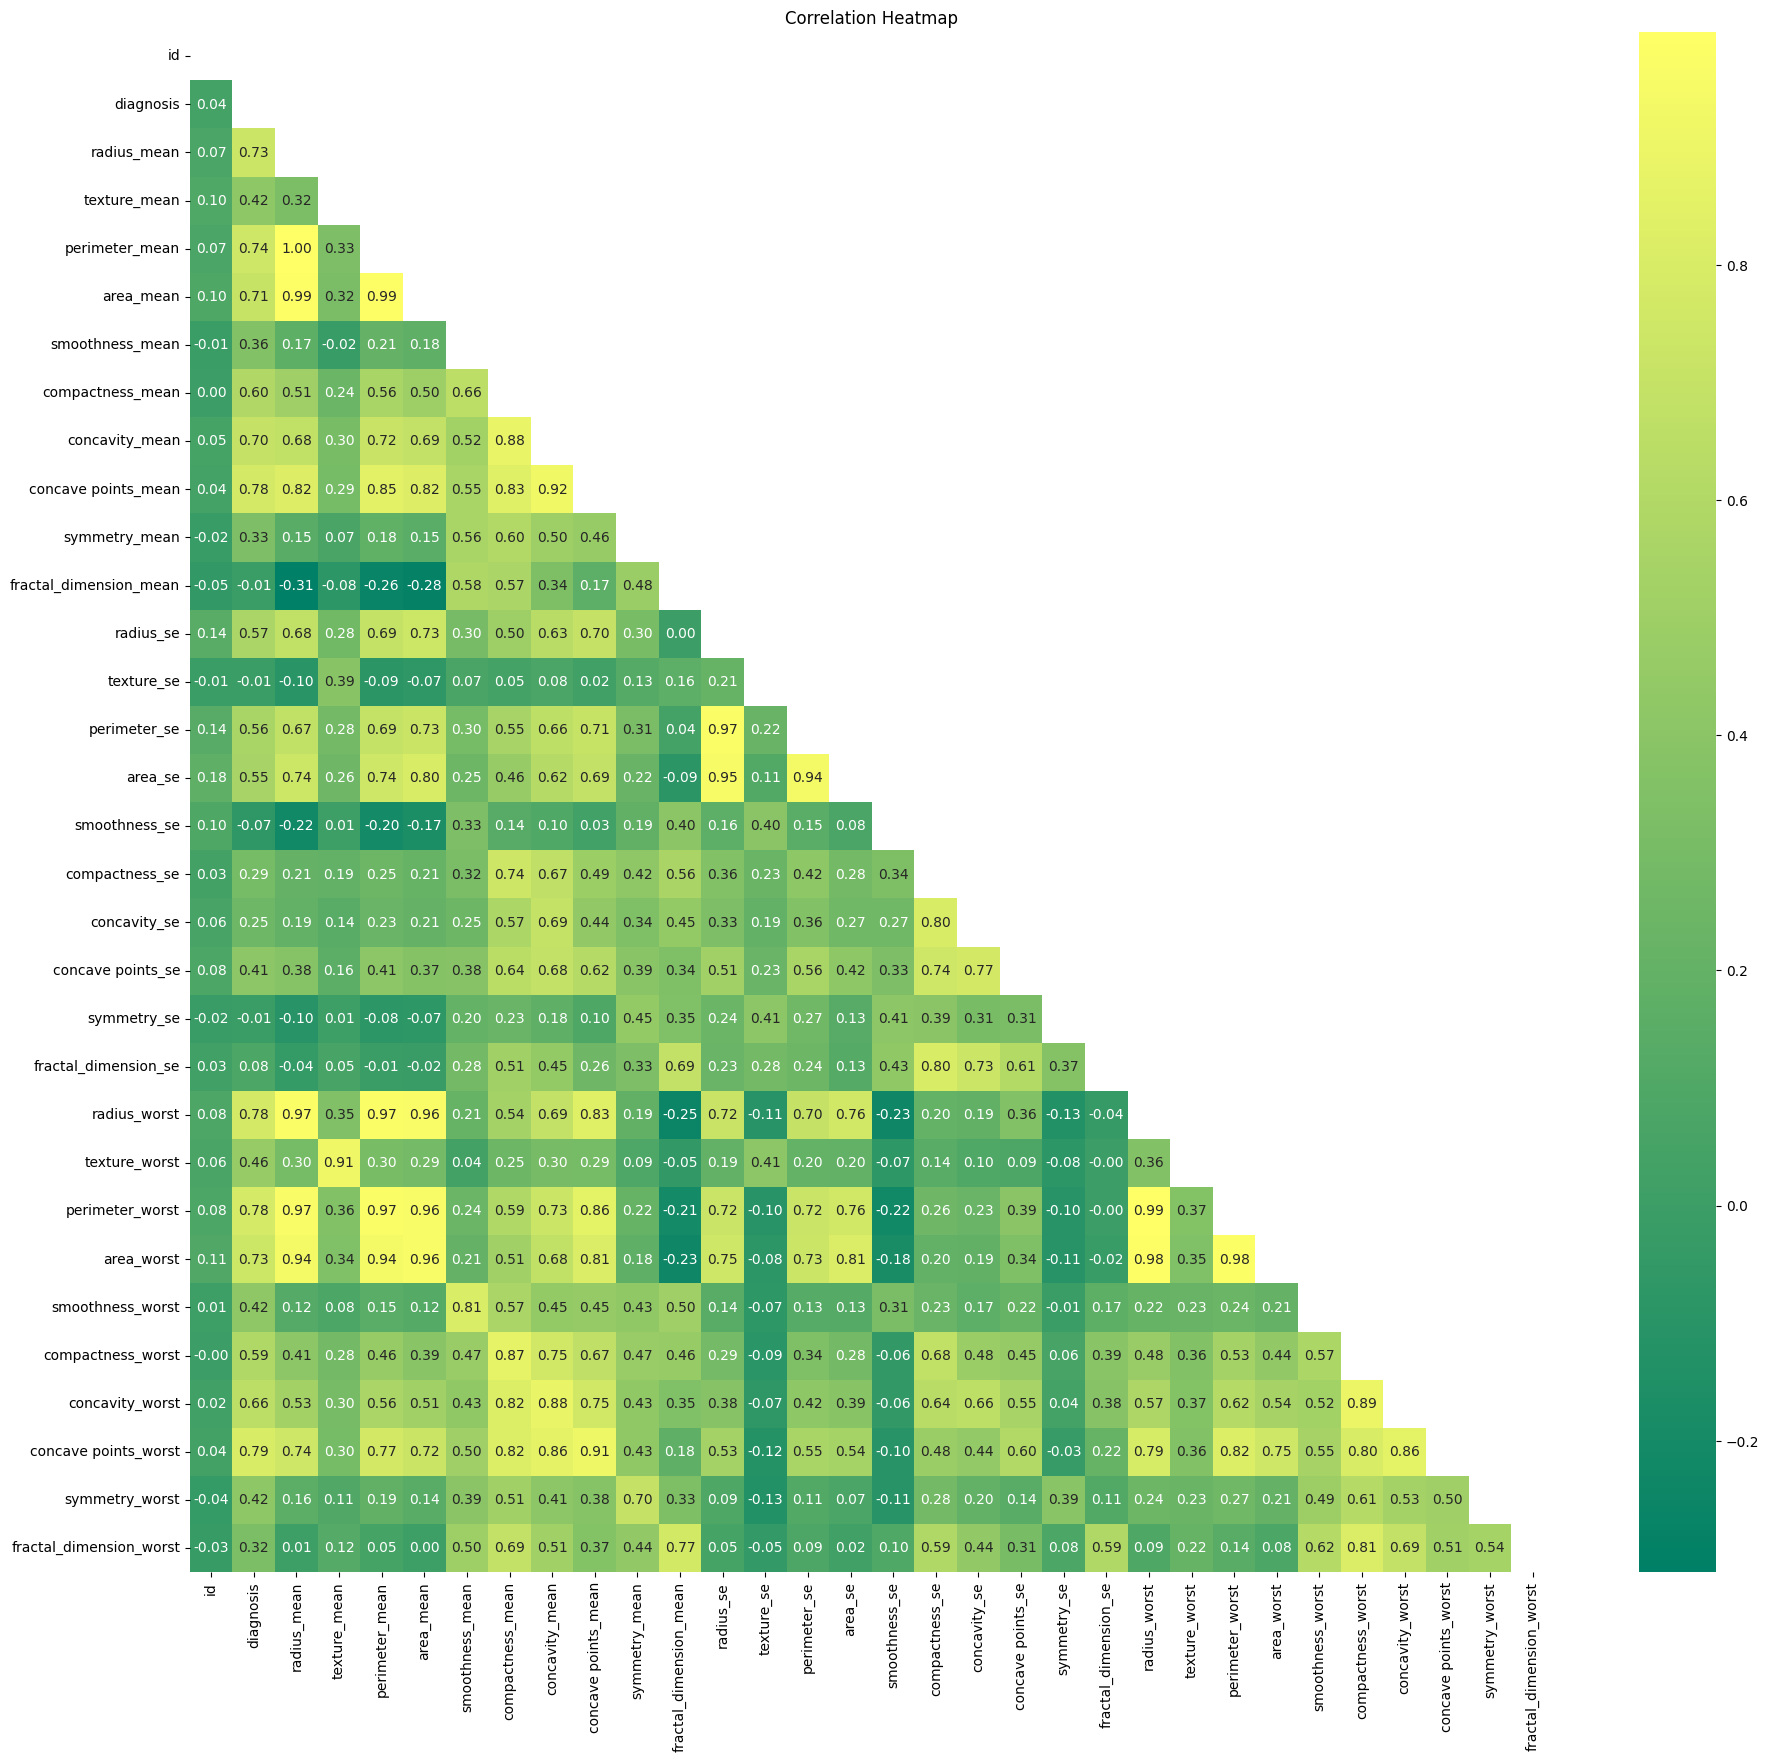

In [1045]:
#printing the half heatmap showing the correlation of the columns between the dataframe
plt.figure(figsize=(22,20))

corr_matrix = dataframe.corr()  #finding correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  #it helps you in printing half heatmap
sns.heatmap(corr_matrix, annot=True, cmap="summer", fmt=".2f", mask=mask)
plt.title("Correlation Heatmap")
plt.show()

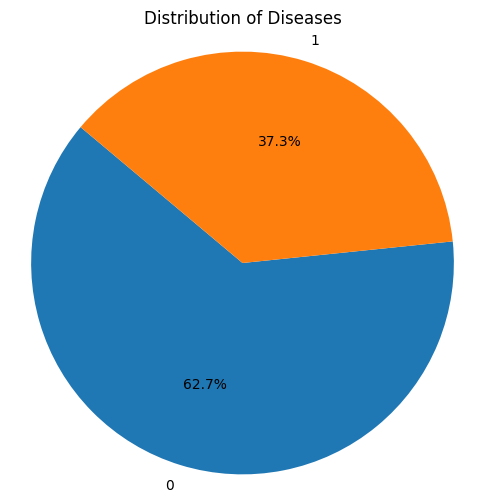

In [1066]:
#Plotting pie graph to look for the percentage of disease
disease_counts = dataframe["diagnosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(6, 6)) 
plt.pie(temp_df["Counts"], labels=temp_df["Disease"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Diseases')  
plt.show()

In [1046]:
corre_diag=dataframe.corr()['diagnosis'].drop('diagnosis')
corre_diag

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [1047]:
dataframe['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

Text(0.5, 1.0, 'Distribution of Diagnosis')

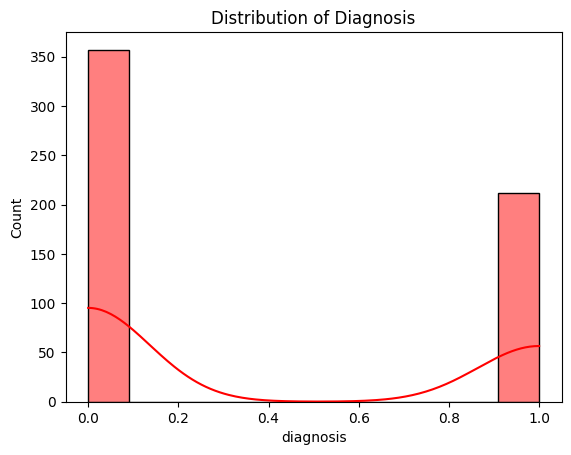

In [1049]:
#plotting histplot graph for diagnosis
sns.histplot(data=dataframe, x='diagnosis',color='red', kde=True)
plt.title("Distribution of Diagnosis")

This graph tells us that there are more than 350 number of people suffering from Malignant and mpre than 200 people suffering from Bening Tumor.

Text(0.5, 1.0, 'Distribution of area_worst')

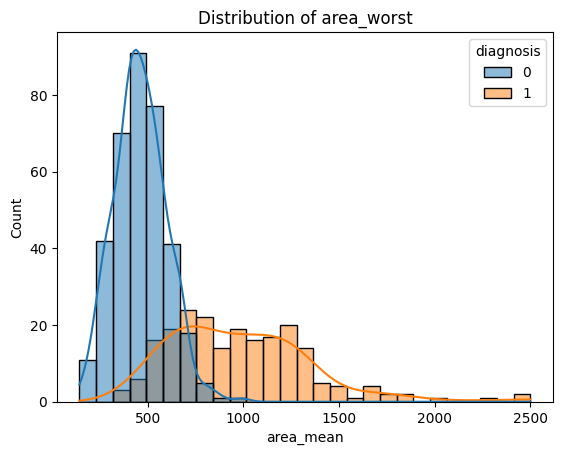

In [1064]:
#plotting histplot graph for area_mean taking hue as diagnosis
sns.histplot(data=dataframe, x='area_mean',hue='diagnosis', kde=True)
plt.title("Distribution of area_worst")

Text(0.5, 1.0, 'Distribution of Radius_se')

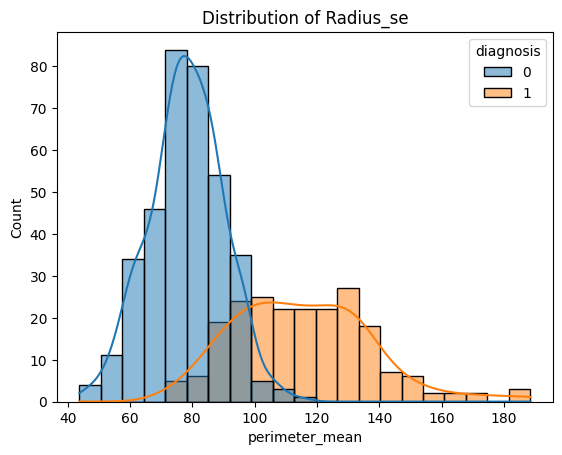

In [1051]:
#plotting histplot graph for perimeter_mean taking hue as diagnosis
sns.histplot(data=dataframe, x='perimeter_mean',hue='diagnosis', kde=True)
plt.title("Distribution of Radius_se")

Text(0.5, 1.0, 'Distribution of smoothness_se')

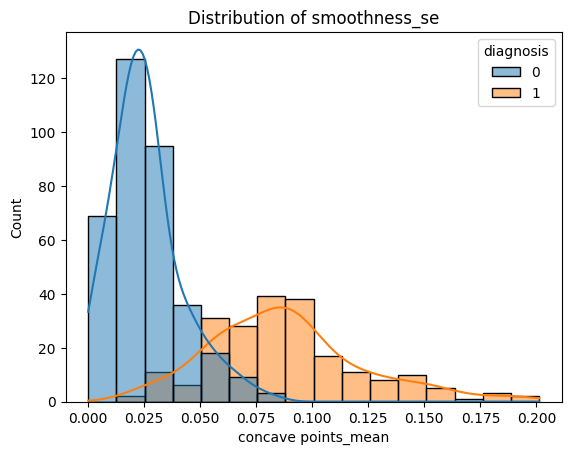

In [1052]:
#plotting histplot graph for concave points_mean taking hue as diagnosis
sns.histplot(data=dataframe, x='concave points_mean',hue='diagnosis', kde=True)
plt.title("Distribution of smoothness_se")

Text(0.5, 1.0, 'Distribution of compactness_worst')

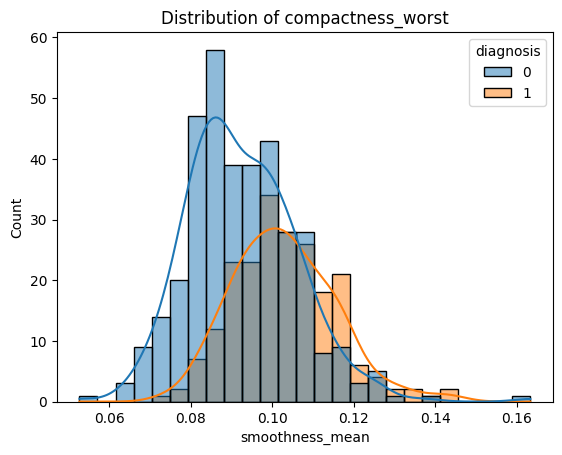

In [1053]:
#plotting histplot graph for smoothness_mean taking hue as diagnosis
sns.histplot(data=dataframe, x='smoothness_mean', hue='diagnosis', kde=True)
plt.title("Distribution of compactness_worst")

In [1054]:
dataframe.columns  #printing all columns name

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [1055]:
#splitting the data into features and target variable
X=dataframe.drop(columns=['diagnosis','texture_se', 'symmetry_se', 'smoothness_se', 'fractal_dimension_mean', 'fractal_dimension_se','id','fractal_dimension_worst','smoothness_worst','symmetry_worst'])
y=dataframe['diagnosis']

In [1056]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [1057]:
#creating an object of StandardScaler
scaler=StandardScaler()

#Scaling the features
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [1058]:
# Initializing the logistic regression model with parameter max_iterations 3000
logistic_regression_model=LogisticRegression(max_iter=3000)

#training the logistic_regression_model
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [1059]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction=logistic_regression_model.predict(X_test)
training_prediction=logistic_regression_model.predict(X_train)

In [1060]:
print("Accuracy score of our model before scaling: ",accuracy_score(y_test,testing_prediction))
print("Accuracy score of our model before scaling: ",accuracy_score(y_train,training_prediction))

Accuracy score of our model before scaling:  0.9766081871345029
Accuracy score of our model before scaling:  0.9547738693467337


In [1061]:
#training again the logistic_regression_model but this time on the scaled data
logistic_regression_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=3000)

In [1062]:
# predicting the values on test data(X_test_scaled) and train data(X_train_scaled)
testing_prediction=logistic_regression_model.predict(X_test_scaled)
training_prediction=logistic_regression_model.predict(X_train_scaled)

In [1063]:
print("Accuracy score of our model before scaling: ",accuracy_score(y_test,testing_prediction))
print("Accuracy score of our model before scaling: ",accuracy_score(y_train,training_prediction))

Accuracy score of our model before scaling:  0.9824561403508771
Accuracy score of our model before scaling:  0.9773869346733668
